In [3]:
import torch
import numpy as np
import random
from collections import deque
import gym
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

class DDPGAgent:
    def __init__(self, state_size, action_size, buffer_size=10000, batch_size=64):
        self.state_size = state_size
        self.action_size = action_size
        self.buffer_size = buffer_size
        self.batch_size = batch_size

        # Replay buffer
        self.replay_buffer = ReplayBuffer(self.buffer_size)

        # Diğer bileşenler, örneğin actor ve critic ağları, optimizatörler vb. burada eklenebilir
        # Örnek: self.actor = ActorNetwork(state_size, action_size) ve self.critic = CriticNetwork(state_size, action_size)

    def select_action(self, state):
        # Aksiyon seçme fonksiyonu (örneğin, rastgele aksiyon seçme)
        return np.random.randint(self.action_size)

    def train(self):
        # Modeli eğitme fonksiyonu (bu, öğrenme ve ağırlıkları güncelleme kısmıdır)
        if len(self.replay_buffer) < self.batch_size:
            return  # Yeterli deneyim yoksa eğitim yapılmaz

        # Deneyimleri replay buffer'dan al
        batch = self.replay_buffer.sample(self.batch_size)
        # Burada batch içeriği ile model eğitimi yapılabilir
        # Actor ve critic ağlarının optimizasyonu burada yapılmalıdır
        # Örneğin, loss hesaplamaları, geri yayılım (backpropagation) vb.


# Eğitim fonksiyonu
# Eğitim fonksiyonu
def train_ddpg(agent, env, num_episodes=10):
    rewards_all_episodes = []  # Epizod başına ödülleri saklamak için bir liste

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            action = agent.select_action(state)  # Aksiyon seçimi
            next_state, reward, done, truncated, info = env.step(action)  # Adım atma
            agent.replay_buffer.add(state, action, reward, next_state, done)  # Replay buffer'a ekle
            agent.train()  # Eğit

            state = next_state
            episode_reward += reward

        rewards_all_episodes.append(episode_reward)
        print(f"Episode {episode+1}: Reward = {episode_reward}")

    return rewards_all_episodes


# MountainCar ortamını ve DDPG ajanını oluştur
env = gym.make("MountainCar-v0")  # MountainCar ortamı
agent = DDPGAgent(state_size=2, action_size=3)  # State boyutu 2, action boyutu 3 (sağa, sola, sabit)

# DDPG'yi eğit
rewards = train_ddpg(agent, env, num_episodes=100)

# Sonuçları görselleştirme
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('DDPG Agent Training Rewards')
plt.show()


c:\Users\asknn\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1: Reward = -6976.0
Episode 2: Reward = -42149.0
Episode 3: Reward = -2373.0
Episode 4: Reward = -39723.0
Episode 5: Reward = -19055.0
Episode 6: Reward = -3679.0
Episode 7: Reward = -6069.0
Episode 8: Reward = -71791.0
Episode 9: Reward = -7678.0
Episode 10: Reward = -22906.0
Episode 11: Reward = -3788.0
Episode 12: Reward = -46000.0
Episode 13: Reward = -94685.0
Episode 14: Reward = -46457.0
Episode 15: Reward = -39443.0
Episode 16: Reward = -5849.0
Episode 17: Reward = -16952.0
Episode 18: Reward = -36182.0
Episode 19: Reward = -25720.0
Episode 20: Reward = -80863.0
Episode 21: Reward = -68189.0
Episode 22: Reward = -53558.0
Episode 23: Reward = -25383.0
Episode 24: Reward = -55993.0
Episode 25: Reward = -9468.0
Episode 26: Reward = -96930.0
Episode 27: Reward = -49897.0
Episode 28: Reward = -15276.0
Episode 29: Reward = -14162.0
Episode 30: Reward = -59378.0
Episode 31: Reward = -18487.0
Episode 32: Reward = -68218.0
Episode 33: Reward = -44764.0
Episode 34: Reward = -31101

NameError: name 'plt' is not defined

c:\Users\asknn\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1: Reward = -82396.0
Episode 2: Reward = -6553.0
Episode 3: Reward = -13354.0
Episode 4: Reward = -26678.0
Episode 5: Reward = -114437.0
Episode 6: Reward = -15266.0
Episode 7: Reward = -33457.0
Episode 8: Reward = -29786.0
Episode 9: Reward = -4351.0
Episode 10: Reward = -39149.0


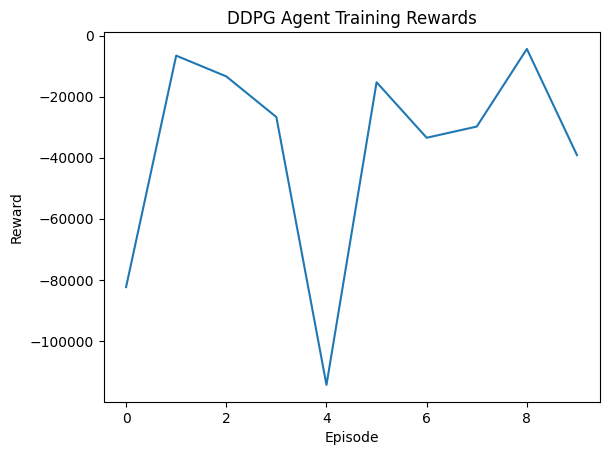

In [1]:
import gym
import torch
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# DDPG Agent Class (actor, critic, ve diğer bileşenler eklenmiştir)
class DDPGAgent:
    def __init__(self, state_size, action_size, learning_rate=1e-3, gamma=0.99, tau=0.001, buffer_size=100000, batch_size=64):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.tau = tau
        self.batch_size = batch_size

        # Replay buffer
        self.replay_buffer = deque(maxlen=buffer_size)
        
        # Actor ve Critic modelleri burada tanımlanacak
        # DDPG için temel yapıyı oluşturmak amacıyla basit bir actor-critic modeli ekledik
        # Burada basit bir model kullanıyoruz, gerçek modelinizin detaylarını eklemeniz gerekebilir

    def select_action(self, state):
        # Aksiyon seçme fonksiyonu (örnek olarak rastgele seçim)
        return np.random.randint(self.action_size)

    def train(self):
        # Eğitme fonksiyonu, replay buffer'dan örnekler alır ve ağı eğitir
        if len(self.replay_buffer) < self.batch_size:
            return

        # Randomly sample from the replay buffer
        batch = random.sample(self.replay_buffer, self.batch_size)
        # Burada actor ve critic ağlarını eğitecek kodları eklemelisiniz

    def update_target_networks(self):
        # Target network'ü güncelleme (DDPG'de kullanılan teknik)
        pass


# Eğitim fonksiyonu
def train_ddpg(agent, env, num_episodes=1000):
    rewards_all_episodes = []  # Epizod başına ödülleri saklamak için bir liste

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            action = agent.select_action(state)  # Aksiyon seçimi
            next_state, reward, done, truncated, info = env.step(action)  # Adım atma
            agent.replay_buffer.append((state, action, reward, next_state, done))  # Replay buffer'a ekle
            agent.train()  # Eğitme adımı

            state = next_state
            episode_reward += reward

        rewards_all_episodes.append(episode_reward)
        print(f"Episode {episode+1}: Reward = {episode_reward}")

    return rewards_all_episodes


# MountainCar ortamını ve DDPG ajanını oluştur
env = gym.make("MountainCar-v0")  # MountainCar ortamı
agent = DDPGAgent(state_size=2, action_size=3)  # State boyutu 2, action boyutu 3 (sağa, sola, sabit)

# DDPG'yi eğit
rewards = train_ddpg(agent, env, num_episodes=10)

# Sonuçları görselleştirme
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('DDPG Agent Training Rewards')
plt.show()


Episode 1: Reward = -17655.0
Episode 2: Reward = -3596.0
Episode 3: Reward = -23459.0
Episode 4: Reward = -26087.0
Episode 5: Reward = -21713.0
Episode 6: Reward = -61201.0
Episode 7: Reward = -16674.0
Episode 8: Reward = -137580.0
Episode 9: Reward = -42677.0
Episode 10: Reward = -89254.0


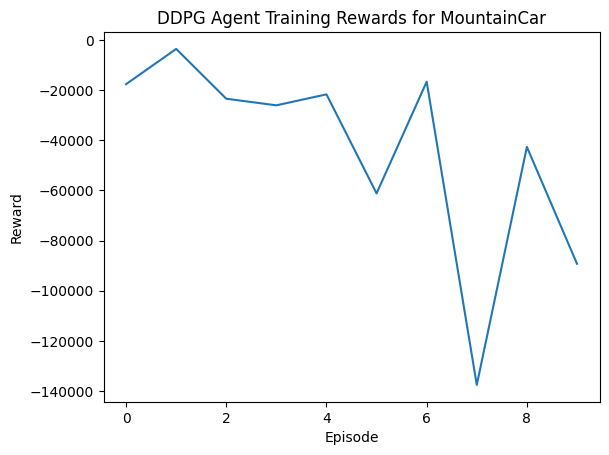

In [2]:
###yukarıdakinin kısa hali

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

# DDPG Agent Class
class DDPGAgent:
    def __init__(self, state_size, action_size, learning_rate=1e-3, gamma=0.99, tau=0.001, buffer_size=100000, batch_size=64):
        self.state_size, self.action_size = state_size, action_size
        self.gamma, self.tau, self.batch_size = gamma, tau, batch_size
        self.replay_buffer = deque(maxlen=buffer_size)

    def select_action(self, state):
        return np.random.randint(self.action_size)

    def train(self):
        if len(self.replay_buffer) < self.batch_size:
            return
        batch = random.sample(self.replay_buffer, self.batch_size)  # Train with random batch
        # Actor-Critic training should be added here

# Eğitim fonksiyonu
def train_ddpg(agent, env, num_episodes=1000):
    rewards = []
    for episode in range(num_episodes):
        state, done, episode_reward = env.reset(), False, 0
        while not done:
            action = agent.select_action(state)
            next_state, reward, done, _, _ = env.step(action)
            agent.replay_buffer.append((state, action, reward, next_state, done))
            agent.train()
            state, episode_reward = next_state, episode_reward + reward
        rewards.append(episode_reward)
        print(f"Episode {episode+1}: Reward = {episode_reward}")
    return rewards

# MountainCar ortamını ve DDPG ajanını oluştur
env = gym.make("MountainCar-v0")
agent = DDPGAgent(state_size=2, action_size=3)

# DDPG'yi eğit
rewards = train_ddpg(agent, env, num_episodes=10)

# Sonuçları görselleştirme
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('DDPG Agent Training Rewards for MountainCar')
plt.show()
